### 🌍 1. Conexión a la API

Se obtienen los datos de las ciudades utilizando la **API de OpenWeatherMap**, lo que permite acceder a información meteorológica en tiempo real.

Para usar la API, se requiere una **API key**, que autentica las solicitudes y permite acceder a los datos.

De cada ciudad se extraen los datos principales:

- **Nombre de la ciudad**
- **Temperatura** (en grados Celsius)
- **Humedad** (%)
- **Velocidad del viento** (m/s)
- **Descripción del clima** (por ejemplo: despejado, nublado, lluvia)


In [134]:
import requests
import pandas as pd
import pycountry_convert as pc
import matplotlib.pyplot as plt
api_key = "79dbbfbd1d007556eedbdb7a433d3ecc"
ciudad = "A Coruña"
url = f"http://api.openweathermap.org/data/2.5/weather?q={ciudad}&appid={api_key}&units=metric&lang=es"
respuesta = requests.get(url) 

# Diccionario para convertir código de continente a nombre
continentes = {
    "AF": "África",
    "NA": "América del Norte",
    "OC": "Oceanía",
    "AN": "Antártida",
    "AS": "Asia",
    "EU": "Europa",
    "SA": "América del Sur"
}

if respuesta.status_code == 200:
    datos = respuesta.json()
    nombre = datos["name"]
    temperatura = datos["main"]["temp"]
    humedad = datos["main"]["humidity"]
    viento = datos["wind"]["speed"]
    clima = datos["weather"][0]["description"]
    pais = datos["sys"]["country"]
    codigo_continente = pc.country_alpha2_to_continent_code(pais)
    continente = continentes.get(codigo_continente, "Desconocido")
    print(f"Ciudad: {nombre}")
    print(f"Temperatura: {temperatura}")
    print(f"Humedad: {humedad} %")
    print(f"Velocidad del viento: {viento} m/s")
    print(f"Clima: {clima}")
    print(f"País: {pais}")
    print(f"Continente: {continente}")
else:
    print(f"Error en la solicitud. Código de estado: {respuesta.status_code}")
    print(respuesta.text)

Ciudad: A Coruña
Temperatura: 11.01
Humedad: 90 %
Velocidad del viento: 7.2 m/s
Clima: llovizna ligera
País: ES
Continente: Europa


#### 2. Data Collection 🌐

Se seleccionaron **20 ciudades** representativas de diferentes continentes para obtener una muestra variada de condiciones climáticas alrededor del mundo.  

- **Ciudades de Europa 🇪🇺:**: A Coruña, Barcelona, London, Berlin  
- **Ciudades de Asia 🌏:**: Tokyo, Dubai, Baku, Bangkok  
- **Ciudades de América del Sur 🌎:** : Buenos Aires, Medellin, Lima, Montevideo  
- **Ciudades de América del Norte 🌎:** : New York, Los Angeles, Toronto, Vancouver  
- **Ciudades de África 🌍:** : Cairo, Lagos, Nairobi, Cabo Verde 




In [135]:
ciudades = ["A Coruña", "Barcelona", "London", "Berlin", "Tokyo", "Dubai", "Bangkok",
            "Baku", "Buenos Aires", "Medellin", "Lima", "Montevideo", "New York", "Los Angeles", "Toronto", "Vancouver", "Cairo", "Lagos", "Nairobi", "Cabo Verde"]
datos_ciudades = []
for ciudad in ciudades:
    url = f"http://api.openweathermap.org/data/2.5/weather?q={ciudad}&appid={api_key}&units=metric&lang=es"
    respuesta = requests.get(url)
    if respuesta.status_code == 200:
        datos = respuesta.json()
        pais = datos["sys"]["country"]
        continente = pc.country_alpha2_to_continent_code(pais)
        codigo_continente = pc.country_alpha2_to_continent_code(pais)
        continente = continentes.get(codigo_continente, "Desconocido")
        datos_ciudades.append({
            "Ciudad": datos["name"],
            "País": datos["sys"]["country"], 
            "Continente": continente,
            "Temperatura": datos["main"]["temp"],
            "Humedad": datos["main"]["humidity"],
            "Velocidad del viento": datos["wind"]["speed"],
            "Clima": datos["weather"][0]["description"]
        })
    else:
        print(f"Error al obtener datos para {ciudad}. Código de estado: {respuesta.status_code}")

df = pd.DataFrame(datos_ciudades)
print(df)

                    Ciudad País         Continente  Temperatura  Humedad  \
0                 A Coruña   ES             Europa        11.01       90   
1                Barcelona   ES             Europa        11.78       60   
2                   London   GB             Europa        11.55       91   
3                   Berlin   DE             Europa         3.10       88   
4                    Tokyo   JP               Asia        12.41       66   
5                    Dubai   AE               Asia        25.96       53   
6                  Bangkok   TH               Asia        26.10       65   
7                     Baku   AZ               Asia        15.03       82   
8             Buenos Aires   AR    América del Sur        23.43       75   
9                 Medellín   CO    América del Sur        21.87       79   
10                    Lima   PE    América del Sur        20.14       78   
11              Montevideo   UY    América del Sur        22.14       80   
12          

#### 3.DATA CLEANING:
- Revisión de datos faltantes
- Los datos finales los guardo en un archivo CSV
- La temperatura, grados ya fue cargado en Celsius
- Comento la linea de la creación del CSV para que no se sobrecargue con datos nuevos.

In [136]:
print("Información del data:", df.info())
print(df.isnull().sum())
# df.to_csv("tiempo.csv", index=False)
print("Archivo 'tiempo.csv' guardado correctamente.")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Ciudad                20 non-null     object 
 1   País                  20 non-null     object 
 2   Continente            20 non-null     object 
 3   Temperatura           20 non-null     float64
 4   Humedad               20 non-null     int64  
 5   Velocidad del viento  20 non-null     float64
 6   Clima                 20 non-null     object 
dtypes: float64(2), int64(1), object(4)
memory usage: 1.2+ KB
Información del data: None
Ciudad                  0
País                    0
Continente              0
Temperatura             0
Humedad                 0
Velocidad del viento    0
Clima                   0
dtype: int64
Archivo 'tiempo.csv' guardado correctamente.


## 4. Análisis de Datos 📊

### 1️⃣ ¿Cuáles son las ciudades más calurosas y más frías? 🌡️
- **Ciudades más calurosas:** Lagos, Dubai, Republic of Cabo Verde, Bangkok, Nairobi  
- **Ciudades más frías:** Toronto, Vancouver, Berlin, New York, London  

### 2️⃣ ¿Existe alguna relación entre la temperatura y la humedad? 💧🌡️
- Se puede calcular la **correlación** entre temperatura y humedad para determinar si a mayor temperatura hay mayor o menor humedad.  
- Un valor de correlación cercano a **1** indica relación positiva, cercano a **-1** relación negativa, y cerca de **0** indica poca o ninguna relación.

### 3️⃣ ¿Qué continente parece tener las ciudades más ventosas? 💨

- Se calculó la **velocidad promedio del viento por continente** a partir de las 20 ciudades estudiadas.  
- Según los valores, **Europa** es el continente con las ciudades más ventosas en promedio.  

### 4️⃣ ¿Cuál es la descripción de clima más común? ⛅
- Se identifica la descripción de clima que aparece con mayor frecuencia entre las ciudades (por ejemplo: despejado, nublado, lluvia).  
- Actualmete el clima más común es cielo claro


In [137]:
import pandas as pd

#Cargo el archivo CSV con los datos limpios
df = pd.read_csv("tiempo.csv")

# Cinco ciudades más calurosas
df_mas_calurosas = df.sort_values(by="Temperatura", ascending=False).head(5)
print("Cinco ciudades más calurosas:\n", df_mas_calurosas[['Ciudad', 'Temperatura']], "\n")

#Cinco ciudades con más frías
df_mas_frias = df.sort_values(by="Temperatura", ascending=True).head(5)
print("Cinco ciudades más frías:\n", df_mas_frias[['Ciudad', 'Temperatura']], "\n")

#Comprobar relación entre temperatura y humedad

correlacion = df["Temperatura"].corr(df["Humedad"])
print(f"Correlación entre temperatura y humedad: {correlacion:.2f}")
if correlacion > 0.5:
    print("Existe una relación entre la temperatura y la humedad.\n")
else:
    print("No existe una relación entre la temperatura y la humedad.\n")

#Velocidad del viento por continente
velocidad_viento= df.groupby("Continente")["Velocidad del viento"].mean()
print("Velocidad promedio del viento por continente:", velocidad_viento, "\n")



Cinco ciudades más calurosas:
                     Ciudad  Temperatura
17                   Lagos        27.94
5                    Dubai        25.96
19  Republic of Cabo Verde        24.68
6                  Bangkok        24.44
18                 Nairobi        21.62 

Cinco ciudades más frías:
        Ciudad  Temperatura
14    Toronto        -3.68
15  Vancouver         3.71
3      Berlin         3.78
12   New York         5.72
2      London        11.47 

Correlación entre temperatura y humedad: -0.14
No existe una relación entre la temperatura y la humedad.

Velocidad promedio del viento por continente: Continente
América del Norte    5.1250
América del Sur      2.6500
Asia                 2.9600
Europa               6.1175
África               5.2300
Name: Velocidad del viento, dtype: float64 



In [138]:
#Clima más común
clima_mas_comun = df['Clima'].value_counts()
print("Clima más común entre las ciudades:\n", clima_mas_comun, "\n")

Clima más común entre las ciudades:
 Clima
cielo claro        6
nubes              4
muy nuboso         3
algo de nubes      3
llovizna ligera    2
niebla             1
lluvia ligera      1
Name: count, dtype: int64 



## 5. Visualización 📊

### 1️⃣ Temperatura promedio por continente 🌡️
- Se calculó la **temperatura promedio** de las ciudades por continente.  

### 2️⃣ Temperatura vs Humedad 💧🌡️
- Se realizó un **gráfico de dispersión** de temperatura frente a humedad.  



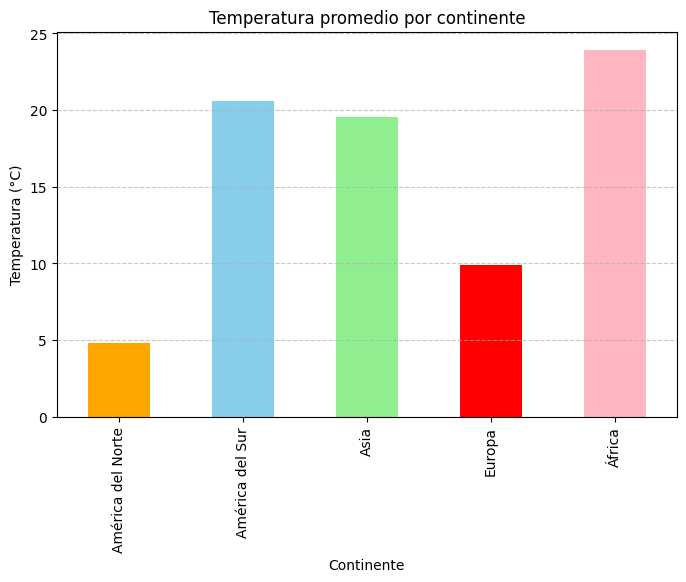

In [139]:
import matplotlib.pyplot as plt
#Relación entre Temperatura y Humedad
temp_promedio = df.groupby("Continente")["Temperatura"].mean()

plt.figure(figsize=(8,5))
colores = ['orange', 'skyblue', 'lightgreen', 'red', 'lightpink']
temp_promedio.plot(kind="bar", color=colores)
plt.title("Temperatura promedio por continente")
plt.ylabel("Temperatura (°C)")
plt.xlabel("Continente")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

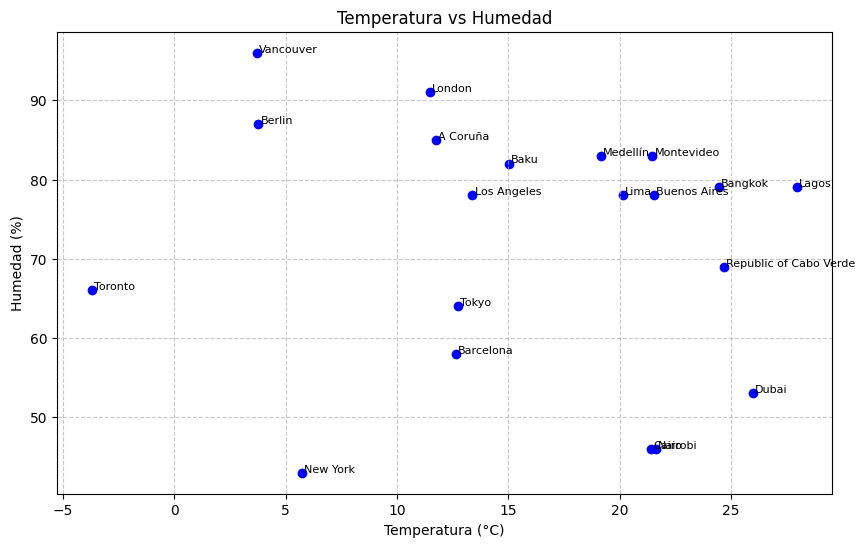

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(df["Temperatura"], df["Humedad"], color="blue")

for i, ciudad in enumerate(df["Ciudad"]):
    plt.text(df["Temperatura"][i]+0.1, df["Humedad"][i]+0.1, ciudad, fontsize=8)

plt.title("Temperatura vs Humedad")
plt.xlabel("Temperatura (°C)")
plt.ylabel("Humedad (%)")
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()


#### 6. Resumen 📝

- **Proceso general 🌍:**  
 Lo primero que hice fue registrarme en la **API de OpenWeatherMap** para obtener una **API key**, mediante `requests.get(url)`.  
  Cree un array con 20 ciudades de distintos continentes  para obtener los datos de cada ciudad y almacenarlos en un **DataFrame**.  
  Ya que en la API no podía ver los continentes, utilice la librería `pycountry_convert`, que a partir del código del país identificaba el continente

- **Limpieza de datos 🧹:**  
  Analice los datos que faltaban. Gracias a `units=metric`, las temperaturas ya se obtienen en **grados Celsius**, sin necesidad de formatearlas.  
  Toda la información la guarde en un **CSV llamado `tiempo.csv`** para mantener un registro de los datos.

- **Análisis 📊:**  
 Calcule las **ciudades más calurosas y más frías**, así como los **continentes con mayor velocidad de viento**.

- **Visualización de datos 📈:**  
  Cree gráficos para observar la **temperatura media por continente** y la **relación entre temperatura y humedad**.  

- **Patrones observados 🔍:**  
  Lo más destacado fue la **descripción del clima más común** y las **ciudades con mayor velocidad de viento**.

- **Dificultades ⚠️:**  
  - La **conexión a la API** fue complicada al inicio, ya que la API key tardó en activarse y aparecía un **error 401**.  
  - Ya que la API no proporciona directamente el continente, tuve que buscar una libreria que si que lo hacía


#### 7 Bonus

### 7️⃣ Comparación: Realidad vs Pronóstico 🌤️

 **A Coruña**, se compararon los datos actuales con el primer pronóstico disponible.

**Observaciones:**
- La temperatura pronosticada es ligeramente más alta que la actual.  
- La humedad ha sido la misma  
- La descripción del clima cambia de llovizna ligera a “lluvia moderada”.  

In [ ]:
ciudad = "A Coruña"

url_actual = f"http://api.openweathermap.org/data/2.5/weather?q={ciudad}&appid={api_key}&units=metric&lang=es"
respuesta_actual = requests.get(url_actual)

url_pronostico = f"http://api.openweathermap.org/data/2.5/forecast?q={ciudad}&appid={api_key}&units=metric&lang=es"
respuesta_pronostico = requests.get(url_pronostico)

if respuesta_actual.status_code == 200 and respuesta_pronostico.status_code == 200:
    datos_actual = respuesta_actual.json()
    datos_pronostico = respuesta_pronostico.json()
    
    pais = datos_actual["sys"]["country"]
    codigo_continente = pc.country_alpha2_to_continent_code(pais)
    continente = continentes.get(codigo_continente, "Desconocido")
    primer_pronostico = datos_pronostico["list"][0]
    
    print(f"Ciudad: {datos_actual['name']} ({pais}, {continente})\n")
    
    print("🌡️ Datos actuales:")
    print(f"Temperatura: {datos_actual['main']['temp']} °C")
    print(f"Humedad: {datos_actual['main']['humidity']} %")
    print(f"Clima: {datos_actual['weather'][0]['description']}\n")
    
    print("📅 Datos pronosticados (próximo pronóstico):")
    print(f"Temperatura: {primer_pronostico['main']['temp']} °C")
    print(f"Humedad: {primer_pronostico['main']['humidity']} %")
    print(f"Clima: {primer_pronostico['weather'][0]['description']}")
    
else:
    print(f"Error en la solicitud. Current: {respuesta_actual.status_code}, Forecast: {respuesta_pronostico.status_code}")



Ciudad: A Coruña (ES, Europa)

🌡️ Datos actuales:
Temperatura: 11.01 °C
Humedad: 90 %
Clima: llovizna ligera

📅 Datos pronosticados (próximo pronóstico):
Temperatura: 11.01 °C
Humedad: 90 %
Clima: lluvia moderada


Ciudad: A Coruña (ES, Europa)

🌡️ Datos actuales:
Temperatura: 11.21 °C
Humedad: 91 %
Clima: llovizna ligera

📅 Datos pronosticados (próximo pronóstico):
Temperatura: 11.21 °C
Humedad: 91 %
Clima: lluvia moderada


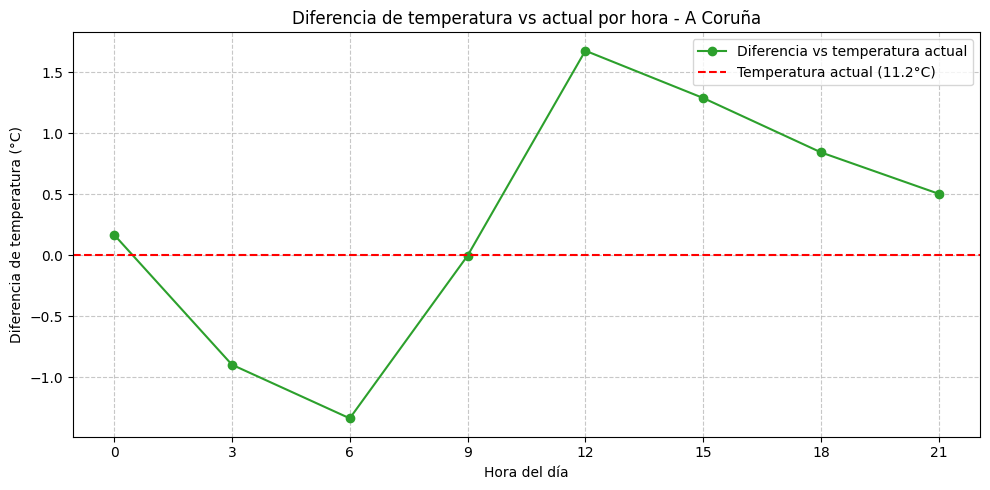

In [ ]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import pycountry_convert as pc

ciudad = "A Coruña"

# -----------------------------
# 1️⃣ Obtener datos actuales y pronóstico
# -----------------------------
url_actual = f"http://api.openweathermap.org/data/2.5/weather?q={ciudad}&appid={api_key}&units=metric&lang=es"
url_pronostico = f"http://api.openweathermap.org/data/2.5/forecast?q={ciudad}&appid={api_key}&units=metric&lang=es"

respuesta_actual = requests.get(url_actual)
respuesta_pronostico = requests.get(url_pronostico)

if respuesta_actual.status_code == 200 and respuesta_pronostico.status_code == 200:
    datos_actual = respuesta_actual.json()
    datos_pronostico = respuesta_pronostico.json()
    pais = datos_actual["sys"]["country"]
    codigo_continente = pc.country_alpha2_to_continent_code(pais)
    continente = continentes.get(codigo_continente, "Desconocido")
    primer_pronostico = datos_pronostico["list"][0]
    print(f"Ciudad: {datos_actual['name']} ({pais}, {continente})\n")
    print("Datos actuales:")
    print(f"Temperatura: {datos_actual['main']['temp']} °C")
    print(f"Humedad: {datos_actual['main']['humidity']} %")
    print(f"Clima: {datos_actual['weather'][0]['description']}\n")
    print("📅 Datos pronosticados (próximo pronóstico):")
    print(f"Temperatura: {primer_pronostico['main']['temp']} °C")
    print(f"Humedad: {primer_pronostico['main']['humidity']} %")
    print(f"Clima: {primer_pronostico['weather'][0]['description']}")
else:
    print(f"Error en la solicitud. Current: {respuesta_actual.status_code}, Forecast: {respuesta_pronostico.status_code}")

current_temp = datos_actual["main"]["temp"]

df_forecast = pd.DataFrame({
    "FechaHora": [item["dt_txt"] for item in datos_pronostico["list"]],
    "Temperatura": [item["main"]["temp"] for item in datos_pronostico["list"]]
})
df_forecast["FechaHora"] = pd.to_datetime(df_forecast["FechaHora"])
df_forecast["Hora"] = df_forecast["FechaHora"].dt.hour

temp_promedio_por_hora = df_forecast.groupby("Hora")["Temperatura"].mean()
diff_vs_actual = temp_promedio_por_hora - current_temp

plt.figure(figsize=(10,5))
plt.plot(temp_promedio_por_hora.index, diff_vs_actual.values, marker='o', linestyle='-', color='tab:green',
         label='Diferencia vs temperatura actual')
plt.axhline(0, color='red', linestyle='--', label=f'Temperatura actual ({current_temp:.1f}°C)')
plt.xlabel("Hora del día")
plt.ylabel("Diferencia de temperatura (°C)")
plt.title(f"Diferencia de temperatura vs actual por hora - {ciudad}")
plt.grid(True, linestyle="--", alpha=0.7)
plt.xticks(temp_promedio_por_hora.index)
plt.legend()
plt.tight_layout()
plt.show()


### 🌍 Automatización de consultas por ubicación

En lugar de decir el nombre de las ciudades, se pueden usar **coordenadas (latitud y longitud)** para obtener datos meteorológicos de forma direct

**Pasos principales:**

1. **Definir coordenadas de la ciudad:**
   - Latitud (`lat`)
   - Longitud (`lon`)


In [155]:
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut
import time


geolocator_app = Nominatim(user_agent="mi_clima")

def obtener_coordenadas(ciudad_nombre):
    try:
        loc = geolocator_app.geocode(ciudad_nombre, timeout=10)
        return (loc.latitude, loc.longitude) if loc else (None, None)
    except GeocoderTimedOut:
        time.sleep(1)
        return obtener_coordenadas(ciudad_nombre)

# Diccionario de coordenadas
coordenadas_ciudades = {}
for ciudad in ciudades:
    coordenadas_ciudades[ciudad] = obtener_coordenadas(ciudad)
    time.sleep(1) 

df_coordenadas = pd.DataFrame.from_dict(coordenadas_ciudades, orient='index', columns=['Latitud', 'Longitud'])
print(df_coordenadas)

             Latitud    Longitud
A Coruña   43.370970   -8.395943
Barcelona  41.382580    2.177073
London     51.507446   -0.127765
Berlin     52.517389   13.395131
Tokyo      35.676860  139.763895
Dubai      25.074282   55.188539
Bangkok    13.752494  100.493509
